In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Step 1: Define the Problem

- In our case, we want to diagnose if a patient is diabetic or not.


# Step 2: Read the diabetes dataset


In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
# Print records of five patientsdf.head(5))

df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.isna().sum() # check for missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Step 3: ML Model Development


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Our features
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Age','BMI']]

# # Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Our targets
y = df['Outcome']


# Split our data: test_size = 0.2, splits our data into 80 % for training and 30% for testing.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.15, random_state = 42) 



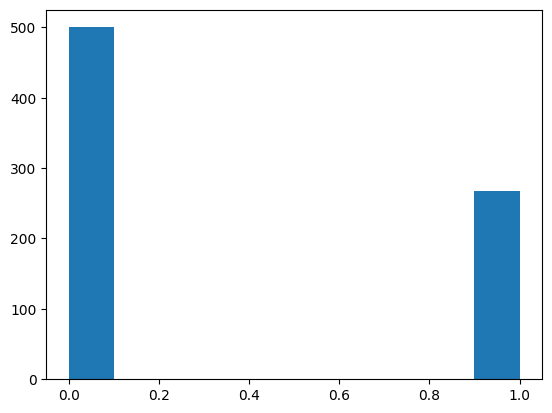

In [6]:
# check the number of patients who have diabetes and patients with out diabetes.

plt.hist(y)
plt.show()

# Step 4: Training Our Model


In [7]:

model = DecisionTreeClassifier() # implements the Decision Tree classifier algorithm
model.fit(X_train, y_train) # Trains the model (algorithm)

DecisionTreeClassifier()

# Step 5: Model Evaluation and Improvement


In [8]:
predictions = model.predict(X_test)

# see the first five patients condition (based on the model's output)
predictions[:5]

array([0, 0, 0, 0, 0])

In [9]:
# Evaluation Metrics

from sklearn.metrics import accuracy_score, confusion_matrix

acc = accuracy_score(y_test, predictions) * 100 # Our models's prediction accuracy
print("Model's Accuracy = ", round(acc),"%")

Model's Accuracy =  78 %


In [10]:
cm = confusion_matrix(y_test, predictions)
cm

array([[62, 14],
       [11, 29]])

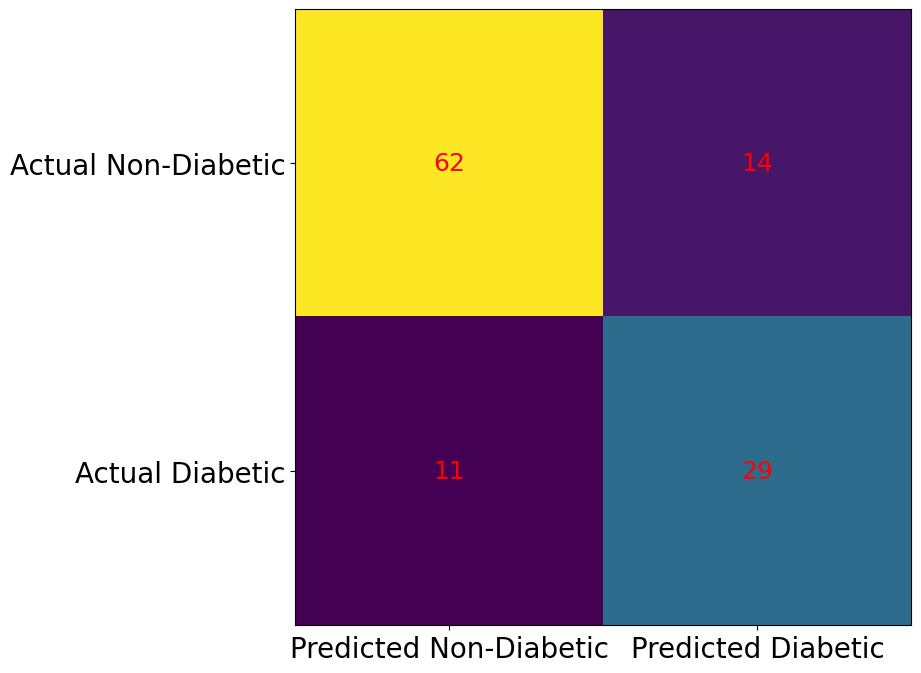

In [11]:
# Confusion Matrix Visualization
def plot_confusion_matrix(cm):
    fig , ax = plt.subplots (figsize = (8,8))
    ax.imshow (cm)
    ax.grid (False)
    ax.xaxis.set (ticks = (0 , 1) , ticklabels = ("Predicted Non-Diabetic" , "Predicted Diabetic"))
    ax.yaxis.set (ticks = (0 , 1) , ticklabels = ("Actual Non-Diabetic" , "Actual Diabetic"))

    ax.tick_params(axis='both', which='major', labelsize=20)
    #ax.tick_params(axis='both', which='minor', labelsize=20)
    #plt.xticks(fontsize=14, rotation=90)

    ax.set_ylim (1.5 , -0.5)
    for i in range (2):
        for j in range (2):
            ax.text (j , i , cm[i,j] , ha = "center" , va ="center" , color ="red", fontsize = 18 )
    plt.show()


# plot confusion matrix of the decision tree model
plot_confusion_matrix(cm)

# Let's also visualize the decision tree


In [16]:
# from sklearn import tree

# tree.plot_tree(model)[0]
# plt.show()

In [26]:
# Now, let's change to Random Forest
import sklearn
import sklearn.ensemble
from sklearn.linear_model import LogisticRegression

rf_model = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Train the rf model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

In [27]:
# compute accuracy of random forest model

rf_acc = accuracy_score(y_test, rf_predictions) * 100

print("Model's Accuracy = ", round(rf_acc),"%")


Model's Accuracy =  72 %


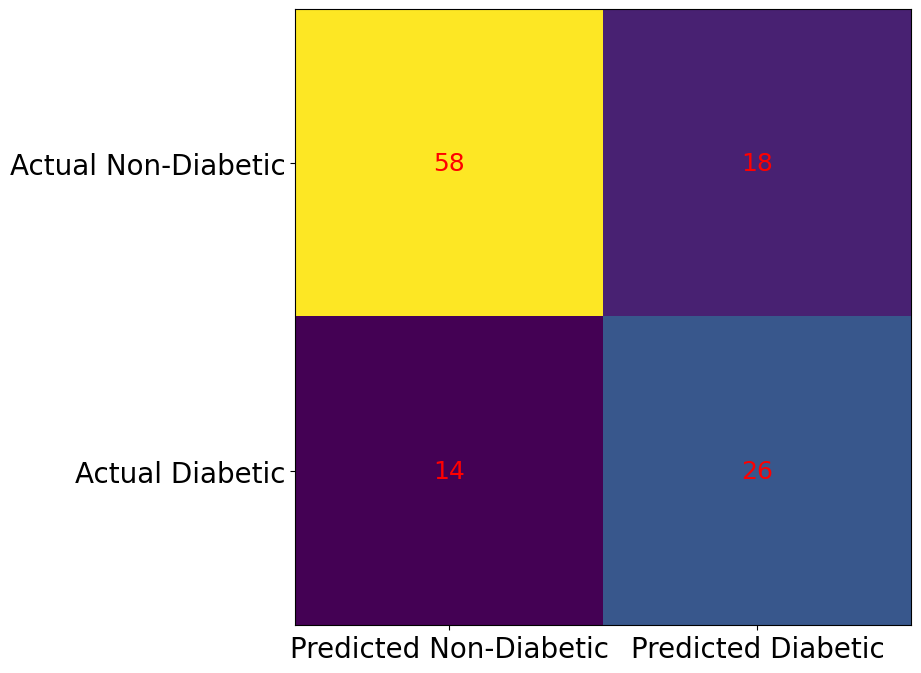

In [28]:
# visualize the confusion matrix of RF model

rf_cm = confusion_matrix(y_test, rf_predictions)

plot_confusion_matrix(rf_cm)